### Heuristic Models (Cost Function Extension)
Look at the Seattle weather in the **data** folder. Come up with a heuristic model to predict if it will rain today. Keep in mind this is a time series, which means that you only know what happened historically (before a given date). One example of a heuristic model is: It will rain tomorrow if it rained more than 1 inch (>1.0 PRCP) today. Describe your heuristic model in the next cell.

**your model here**

Examples:

If rained yesterday it will rain today.

If it rained yesterday or the day before it will rain today.


In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_4_ML/data/seattle_weather_1948-2017.csv')

numrows = 25549 # can be as large as 25549

#create an empty dataframe to hold 100 values
heuristic_df = pd.DataFrame({'yesterday':[0.0]*numrows,
                             'today':[0.0]*numrows,
                             'tomorrow':[0.0]*numrows,
                             'guess':[False]*numrows, #logical guess
                             'rain_tomorrow':[False]*numrows, #historical observation
                             'correct':[False]*numrows, #TRUE if your guess matches the historical observation
                             'true_positive':[False]*numrows, #TRUE If you said it would rain and it did
                             'false_positive':[False]*numrows,#TRUE If you sait id would rain and it didn't
                             'true_negative':[False]*numrows, #TRUE if you said it wouldn't rain and it didn't
                             'false_negative':[False]*numrows}) #TRUE if you said it wouldn't raing and it did

#sort columns for convience
seq = ['yesterday',
       'today',
       'tomorrow',
       'guess',
       'rain_tomorrow',
       'correct',
       'true_positive',
       'false_positive',
       'true_negative',
       'false_negative']
heuristic_df = heuristic_df.reindex(columns=seq)

In [ ]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [ ]:

heuristic_df.head()

,yesterday,today,tomorrow,guess,rain_tomorrow,correct,true_positive,false_positive,true_negative,false_negative
0,0.0,0.0,0.0,False,False,False,False,False,False,False
1,0.0,0.0,0.0,False,False,False,False,False,False,False
2,0.0,0.0,0.0,False,False,False,False,False,False,False
3,0.0,0.0,0.0,False,False,False,False,False,False,False
4,0.0,0.0,0.0,False,False,False,False,False,False,False


Build a loop to add your heuristic model guesses as a column to this dataframe

In [ ]:
# here is an example loop that populates the dataframe created earlier
# with the total percip from yesterday and today
# then the guess is set to true if rained both yesterday and today 
for z in range(numrows):
    #start at time 2 in the data frame
    i = z + 2
    #pull values from the dataframe
    yesterday = df.iloc[(i-2),1]
    today = df.iloc[(i-1),1]
    tomorrow = df.iloc[i,1]
    rain_tomorrow = df.iloc[(i),1]
    
    heuristic_df.iat[z,0] = yesterday
    heuristic_df.iat[z,1] = today
    heuristic_df.iat[z,2] = tomorrow
    heuristic_df.iat[z,3] = False # set guess default to False
    heuristic_df.iat[z,4] = rain_tomorrow
    
    #example hueristic
    if today > 0.0 and yesterday > 0.0:
        heuristic_df.iat[z,3] = True
        
    if heuristic_df.iat[z,3] == heuristic_df.iat[z,4]:
        heuristic_df.iat[z,5] = True
        if heuristic_df.iat[z,3] == True:
            heuristic_df.iat[z,6] = True #true positive
        else:
            heuristic_df.iat[z,8] = True #true negative
    else:
        heuristic_df.iat[z,5] = False
        if heuristic_df.iat[z,3] == True:
            heuristic_df.iat[z,7] = True #false positive
        else:
            heuristic_df.iat[z,9] = True #false negative

### Evaluate the performance of the Heuristic model

***split data into training and testing***

In [ ]:
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# enter split function here to make h_train and h_test subsets of the data
h_train, h_test = train_test_split(heuristic_df)

In [ ]:
h_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19161 entries, 21085 to 13651
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yesterday       19158 non-null  float64
 1   today           19159 non-null  float64
 2   tomorrow        19159 non-null  float64
 3   guess           19161 non-null  bool   
 4   rain_tomorrow   19161 non-null  bool   
 5   correct         19161 non-null  bool   
 6   true_positive   19161 non-null  bool   
 7   false_positive  19161 non-null  bool   
 8   true_negative   19161 non-null  bool   
 9   false_negative  19161 non-null  bool   
dtypes: bool(7), float64(3)
memory usage: 729.8 KB


In [ ]:
h_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6388 entries, 4384 to 13479
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yesterday       6388 non-null   float64
 1   today           6387 non-null   float64
 2   tomorrow        6387 non-null   float64
 3   guess           6388 non-null   bool   
 4   rain_tomorrow   6388 non-null   bool   
 5   correct         6388 non-null   bool   
 6   true_positive   6388 non-null   bool   
 7   false_positive  6388 non-null   bool   
 8   true_negative   6388 non-null   bool   
 9   false_negative  6388 non-null   bool   
dtypes: bool(7), float64(3)
memory usage: 243.3 KB


***the accuracy of your predicitions***

In [26]:
from sklearn.metrics import accuracy_score
print(accuracy_score(heuristic_df['correct'], heuristic_df['guess']))

0.4266703197776821


In [21]:
# we used this simple approach in the first part to see what percent of the time we where correct 
# calculated as (true positive + true negative)/ number of guesses
### Training Accuracy ###
Guesses = h_train['guess'].count()
True_Pos = sum(h_train['true_positive']==True)
True_Neg = sum(h_train['true_negative']==True)
Accuracy = (True_Pos+True_Neg)/Guesses
print('Training Accuracy: ',round(Accuracy * 100),'%')

Training Accuracy:  67.0 %


In [ ]:
### Testing Accuracy ###
Guesses = h_test['guess'].count()
True_Pos = sum(h_test['true_positive']==True)
True_Neg = sum(h_test['true_negative']==True)
Accuracy = (True_Pos+True_Neg)/Guesses
print('Testing Accuracy: ',round(Accuracy * 100),'%')

Testing Accuracy:  68.0 %


***the precision of your predicitions***

In [25]:
from sklearn.metrics import precision_score
print(precision_score(heuristic_df['correct'], heuristic_df['guess']))

0.674109000138677


In [ ]:
# precision is the percent of your postive prediction which are correct
# more specifically it is calculated (num true positive)/(num tru positive + num false positive)
True_Pos = sum(h_train['true_positive']==True)
False_Pos = sum(h_train['false_positive']==True)
Precision = (True_Pos)/(False_Pos+True_Pos)
print('Training Precision: ',round(Precision * 100),'%')

Training Precision:  67 %


In [ ]:
### Testing Precision ###
True_Pos = sum(h_test['true_positive']==True)
False_Pos = sum(h_test['false_positive']==True)
Precision = (True_Pos)/(False_Pos+True_Pos)
print('Testing Precision: ',round(Precision * 100),'%')

Testing Precision:  69 %


***the recall of your predicitions***

In [24]:
from sklearn.metrics import recall_score
print(recall_score(heuristic_df['correct'], heuristic_df['guess']))

0.2832915671076403


In [ ]:
# recall the percent of the time you are correct when you predict positive
# more specifically it is calculated (num true positive)/(num tru positive + num false negative)

### Training Recall ###
True_Pos = sum(h_train['true_positive']==True)
False_Neg = sum(h_train['false_negative']==True)
Recall = (True_Pos)/(False_Neg+True_Pos)
print('Training Recall: ',round(Recall * 100),'%')

Training Recall:  44 %


In [ ]:
### Testing Recall ###
True_Pos = sum(h_test['true_positive']==True)
False_Neg = sum(h_test['false_negative']==True)
Recall = (True_Pos)/(False_Neg+True_Pos)
print('Testing Recall: ',round(Recall * 100),'%')

Testing Recall:  45 %


In [22]:
## Accuracy
heuristic_df['correct'].value_counts()/numrows

True     0.671611
False    0.328389
Name: correct, dtype: float64

***The sum of squared error (SSE) of your predictions***

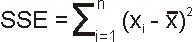